In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


np.random.seed(3)

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 2.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/hard_test/',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


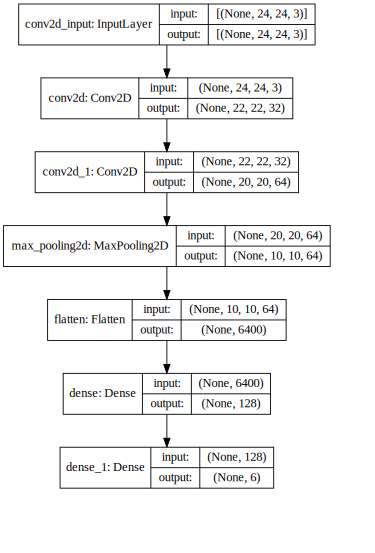

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=test_generator,
)

/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
15/15 [==============================] - 2s 80ms/step - loss: 1.8186 - accuracy: 0.1674 - val_loss: 1.7834 - val_accuracy: 0.2333
Epoch 2/100
15/15 [==============================] - 0s 18ms/step - loss: 1.6547 - accuracy: 0.3156 - val_loss: 1.8160 - val_accuracy: 0.2333
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 1.4172 - accuracy: 0.3416 - val_loss: 1.6661 - val_accuracy: 0.3333

In [4]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 0s 4ms/step - loss: 1.4164 - accuracy: 0.7000
accuracy: 70.00%


In [5]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

print(test_generator.filenames)

-- Predict --
{'circle': 0, 'question': 1, 'rectangle': 2, 'triangle': 3, 'v': 4, 'x': 5}
[[0.000 0.000 0.998 0.002 0.000 0.000]
 [0.000 0.001 0.001 0.461 0.534 0.003]
 [0.000 0.000 0.000 0.000 0.003 0.997]
 [0.038 0.000 0.960 0.002 0.000 0.000]
 [0.000 0.000 0.920 0.080 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.487 0.512]
 [0.000 0.000 0.000 0.000 0.968 0.032]
 [0.000 0.000 0.000 0.006 0.994 0.000]
 [0.010 0.000 0.983 0.007 0.000 0.000]
 [0.001 0.040 0.068 0.890 0.001 0.000]
 [0.000 0.000 0.989 0.011 0.000 0.000]
 [0.000 0.000 0.000 0.004 0.994 0.002]
 [0.000 0.000 0.984 0.016 0.000 0.000]
 [0.011 0.000 0.989 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.310 0.030 0.657 0.002 0.001 0.000]
 [0.001 0.226 0.080 0.028 0.662 0.004]
 [0.000 0.000 0.010 0.990 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.999 0.000 0.001 0.000 0.001]
 [0.000 0.000 0.000 0.000 0.145 0.855]
 [0.000 0.010 0.000 0.365 0.205 0.420]
 [0.000 0.000 0.000 0.000 0.122 0.878]
 [0.000 0.780

/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
